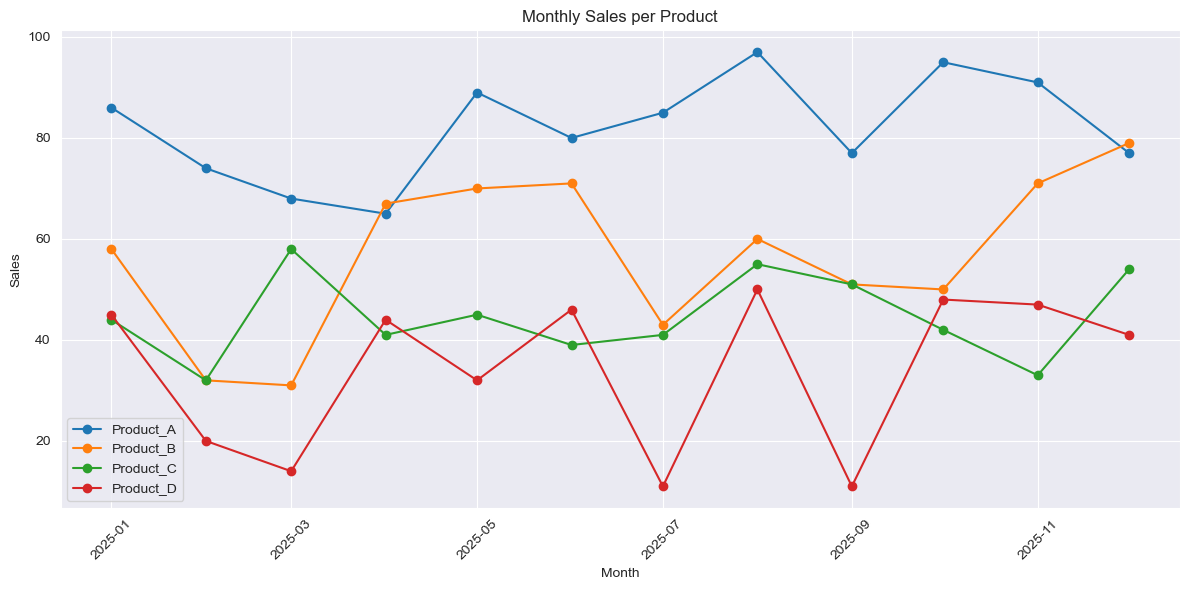

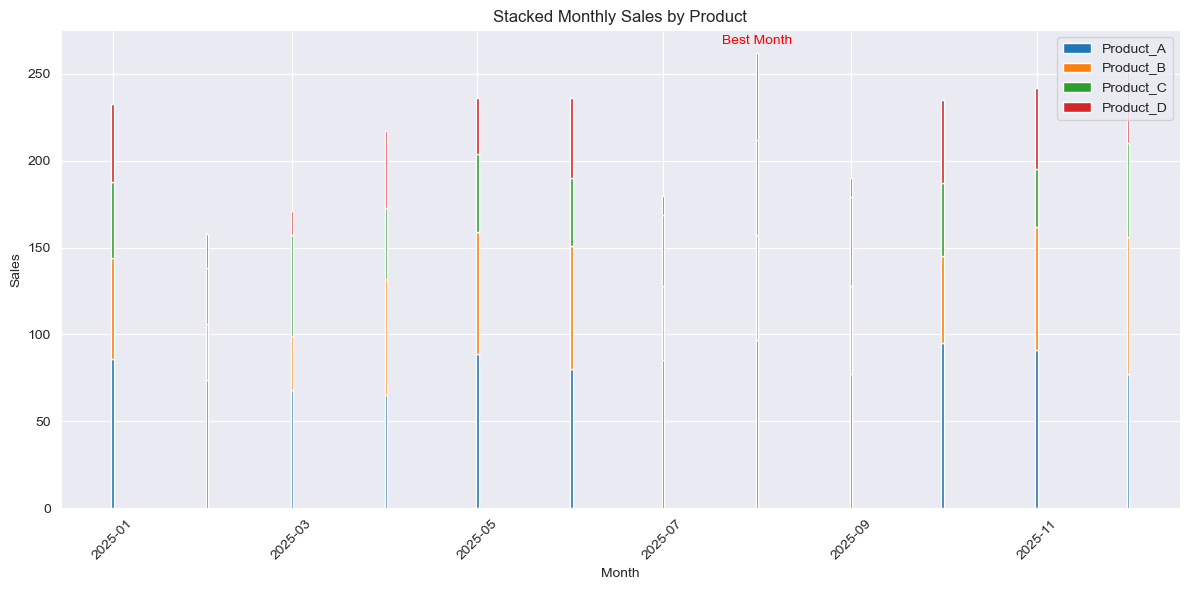

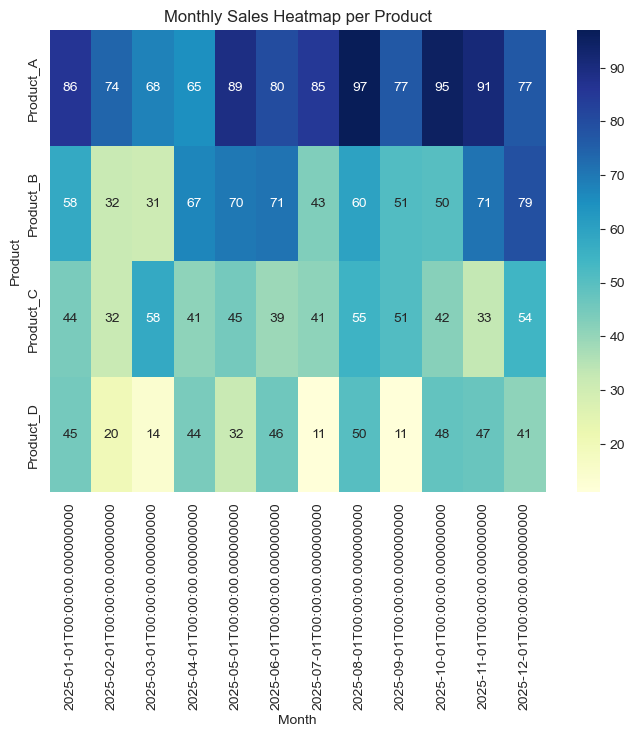

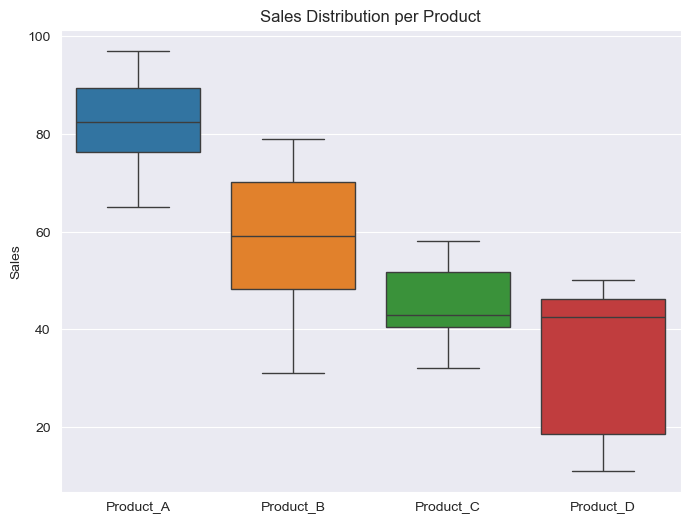

Product contributing most to overall sales: Product_A
Best performing quarter: Q4

Suggestions to improve sales strategy:
- Focus marketing efforts on best-selling products.
- Analyze what drove sales in the best quarter (seasonality, promotions) and replicate strategies.
- Identify low-selling products and consider discounts, bundles, or replacement products.


In [2]:
# 1️⃣ Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load final sales data
final = pd.read_csv('/home/mlk/PycharmProjects/ML_cours/project_sales/data/final.csv')

# Convert 'Month' to datetime
final['Month'] = pd.to_datetime(final['Month'])

# 5️⃣ Visualizations

# ---- Line chart for each product across months ----
plt.figure(figsize=(12,6))
for product in ['Product_A','Product_B','Product_C','Product_D']:
    plt.plot(final['Month'], final[product], marker='o', label=product)
plt.title('Monthly Sales per Product')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ---- Stacked bar chart of total monthly sales by product ----
plt.figure(figsize=(12,6))
products = ['Product_A','Product_B','Product_C','Product_D']
plt.bar(final['Month'], final['Product_A'], label='Product_A')
plt.bar(final['Month'], final['Product_B'], bottom=final['Product_A'], label='Product_B')
plt.bar(final['Month'], final['Product_C'], bottom=final['Product_A']+final['Product_B'], label='Product_C')
plt.bar(final['Month'], final['Product_D'], bottom=final['Product_A']+final['Product_B']+final['Product_C'], label='Product_D')

# Annotate best month
best_month_idx = final['Total_sales'].idxmax()
best_month_val = final.loc[best_month_idx,'Total_sales']
plt.text(final.loc[best_month_idx,'Month'], best_month_val+5, 'Best Month', ha='center', color='red')

plt.title('Stacked Monthly Sales by Product')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# ---- Seaborn heatmap: monthly sales of each product ----
plt.figure(figsize=(8,6))
heatmap_data = final.set_index('Month')[products]
sns.heatmap(heatmap_data.T, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Monthly Sales Heatmap per Product')
plt.ylabel('Product')
plt.xlabel('Month')
plt.show()


# ---- Seaborn boxplot: distribution of sales per product ----
plt.figure(figsize=(8,6))
sns.boxplot(data=final[products])
plt.title('Sales Distribution per Product')
plt.ylabel('Sales')
plt.show()


# 6️⃣ Conclusion Questions
# Which product contributes most to overall sales
total_per_product = final[products].sum()
best_product = total_per_product.idxmax()
print(f"Product contributing most to overall sales: {best_product}")

# Which quarter performs best
output = pd.read_csv('/home/mlk/PycharmProjects/ML_cours/project_sales/data/output.csv', index_col=0)
best_quarter = output['Total_sales/quarter'].idxmax()
print(f"Best performing quarter: Q{best_quarter}")

# Suggestions to improve sales strategy
print("\nSuggestions to improve sales strategy:")
print("- Focus marketing efforts on best-selling products.")
print("- Analyze what drove sales in the best quarter (seasonality, promotions) and replicate strategies.")
print("- Identify low-selling products and consider discounts, bundles, or replacement products.")
